Mikayla Wilson 


Test Assignment

In [90]:
#importing necessary packages
from astropy.io import fits 
import numpy as np
from matplotlib import pyplot as plt
import photutils

1. Open the file test.fits in Python.

In [25]:
test_fits = fits.open('test.fits')

2. Crop a 40x40 pixel region around the brightest star in the image

In [42]:
#visualizing the data:

#2D array of the image data
test_fits[0].data

array([[ -2.227182  ,  -5.41509   ,   7.4876447 , ...,  -1.3699486 ,
          1.5474156 ,   9.691012  ],
       [ -1.0456786 ,   0.78287786, -19.498964  , ...,   2.1336942 ,
         -7.781312  ,   2.6166992 ],
       [  5.364392  ,  -5.131038  ,   4.6704698 , ...,   2.7853897 ,
          0.8941637 ,   2.521664  ],
       ...,
       [  2.585795  ,  13.344683  ,   3.1838627 , ...,  -0.81545573,
         -0.5862196 ,   0.33585817],
       [ -0.9138381 ,  -1.1429553 ,   2.0158374 , ...,   0.7788194 ,
          5.946528  ,  -5.423502  ],
       [  2.2539082 ,   1.0218745 ,  -5.303226  , ...,   6.710577  ,
          4.0441856 ,  -5.2206407 ]], dtype=float32)

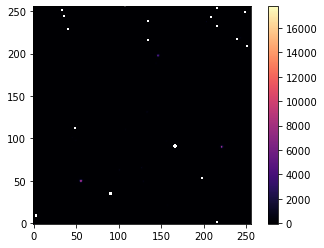

In [67]:
#plotting the image with imshow
image = test_fits[0].data

#using origin="lower" to avoid y-axis plotting in decreasing order
#vmin and vmax define colormap range
plt.imshow(image, origin="lower", cmap="magma") 
plt.colorbar()

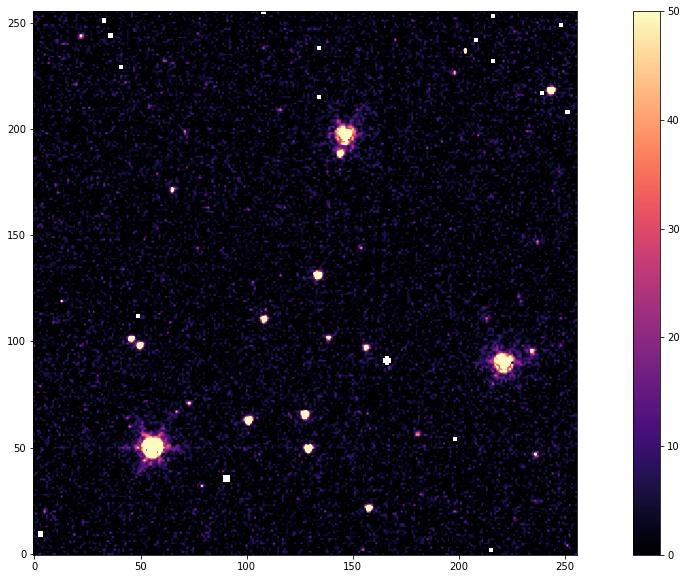

In [75]:
#finding brightest star

#larger plot
plt.figure(figsize=(20,10))

#using origin="lower" to avoid y-axis plotting in decreasing order
#vmin and vmax define colormap range
plt.imshow(image, origin="lower", cmap="magma", vmin=0, vmax=50) 

#adds colorbar on the side
plt.colorbar()

By altering the colorbar range we're able to see the brightest star of the three main ones is the one on the bottom left.

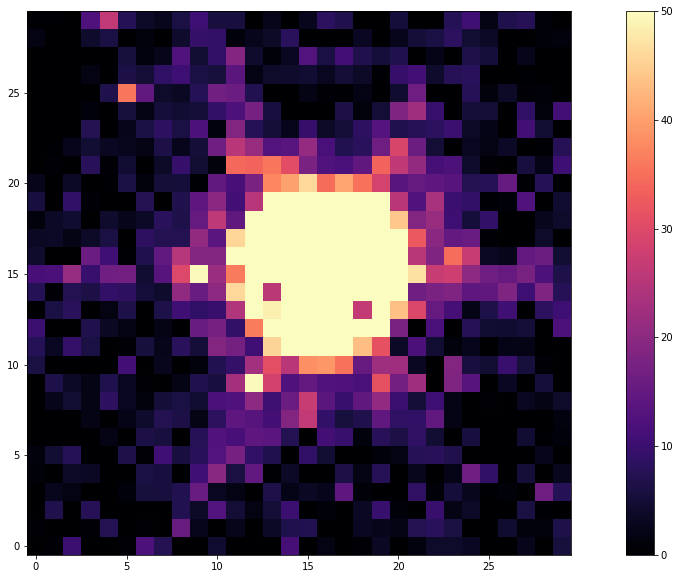

In [85]:
#zooming into this star by indexing (< I think I used that term correctly) the pixels it falls within
#we see it is near ~50,50 so choosing a range around that point with: image[x and y ranges]

plt.figure(figsize=(20,10))
plt.imshow(image[35:65,40:70], origin="lower", cmap="magma", vmin=0, vmax=50) 
plt.colorbar()

3. Save the cropped region as test2.fits

In [86]:
#the name we want our new fits file to be
outfile = 'test2.fits'
#the index we chose for the star
brightest_star = image[35:65,40:70]

hdu = fits.PrimaryHDU(brightest_star)
hdu.writeto(outfile, overwrite=True)

4. Use the code photutils to measure the centroid of this star in the uncropped region

In [98]:
#installed photutils
#photutils.centroids.centroid_sources = "calculate the centroid of sources at the defined positions"
photutils.centroids.centroid_sources(image, 55, 50) #55,50 is location of the star

(array([55.74558816]), array([50.16340749]))